# Fish Market 
- Objective : Predict the weight of fish based on species, vertical length, diagonal length, cross length, height, diagonal width

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Load the raw data

In [2]:
raw_data = pd.read_csv('fish.csv')
raw_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Data description

- Species = Species name of fish
- Weight = Weight of fish in gram (g)
- Length1 = Vertical length in cm
- Length2 = Diagonal length in cm 
- Length3 = Cross length in cm 
- Height = Height in cm
- Width = Diagonal width in cm

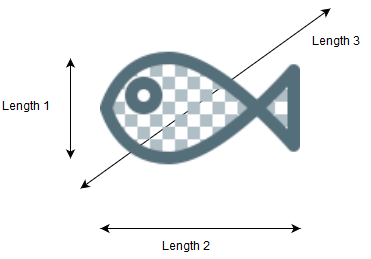

## Preprocessing

In [3]:
raw_data.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


### Checking the missing values

In [4]:
raw_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Exploring the PDFs

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


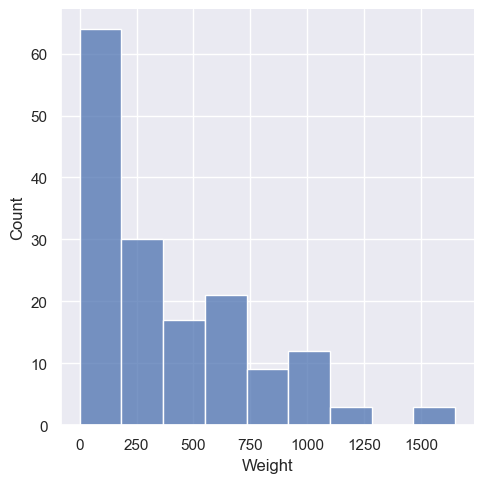

In [6]:
sns.displot(raw_data['Weight'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


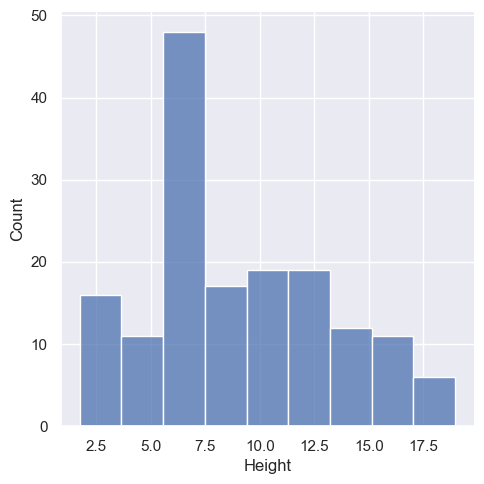

In [7]:
sns.displot(raw_data['Height'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


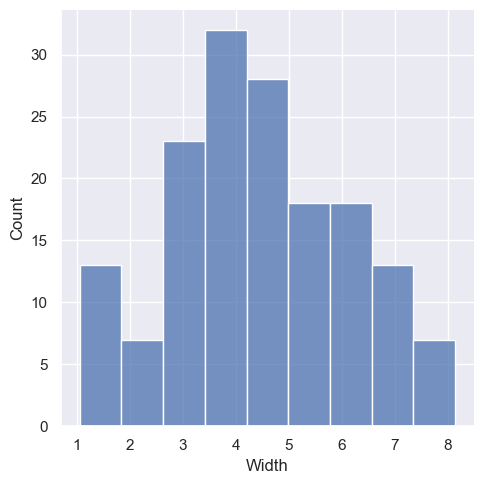

In [8]:
sns.displot(raw_data['Width'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


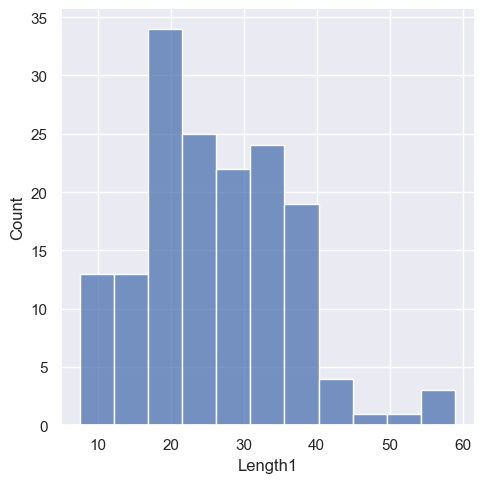

In [9]:
sns.displot(raw_data['Length1'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


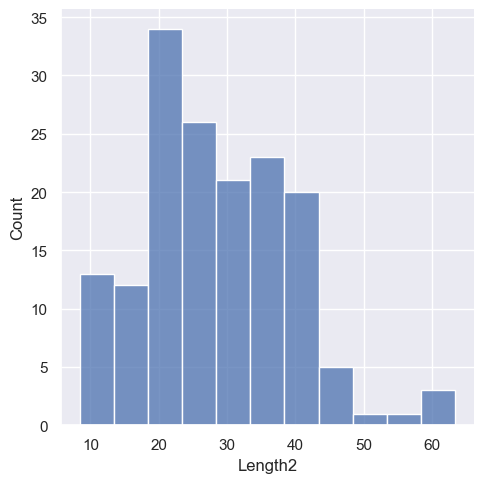

In [11]:
sns.displot(raw_data['Length2'])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


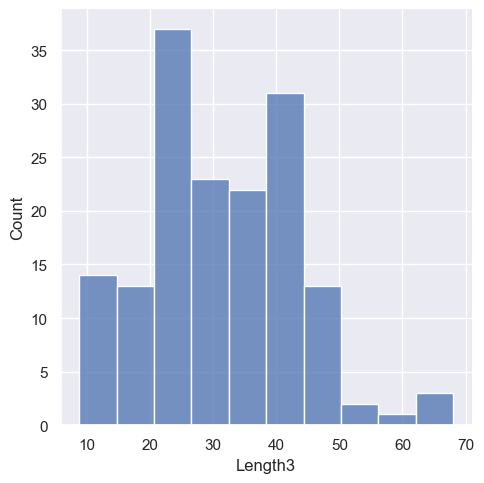

In [12]:
sns.displot(raw_data['Length3'])

### Checking the OLS assumptions

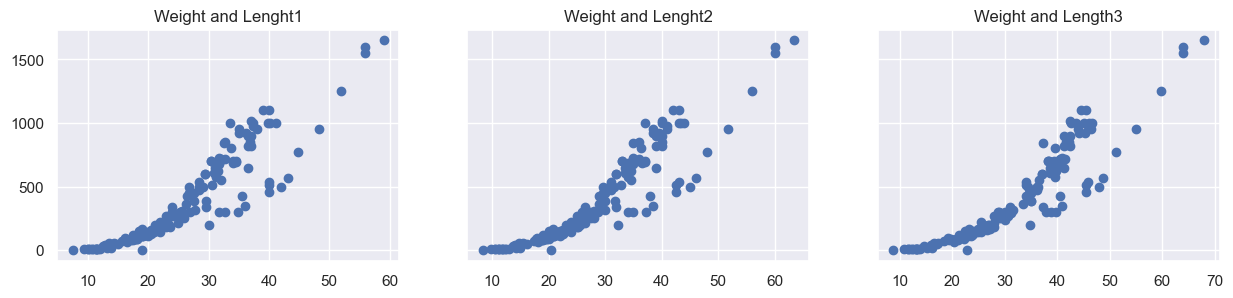

In [13]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(raw_data['Length1'], raw_data['Weight'])
ax1.set_title('Weight and Lenght1')

ax2.scatter(raw_data['Length2'], raw_data['Weight'])
ax2.set_title('Weight and Lenght2')

ax3.scatter(raw_data['Length3'], raw_data['Weight'])
ax3.set_title('Weight and Length3')

plt.show()

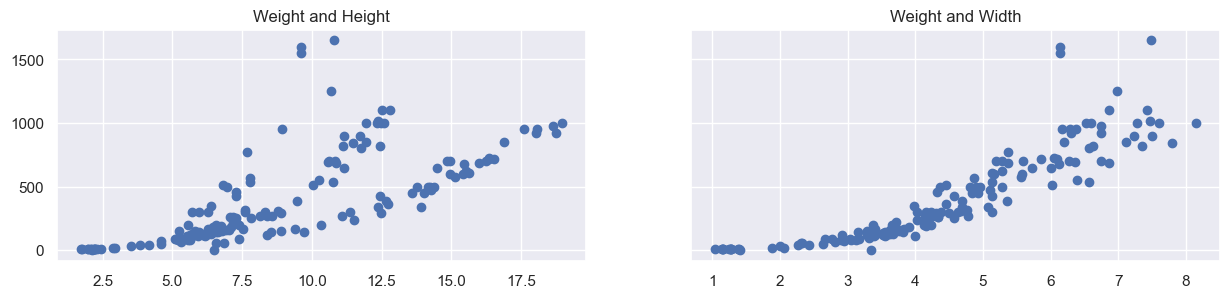

In [60]:
f, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(15,3))
ax1.scatter(raw_data['Height'], raw_data['Weight'])
ax1.set_title('Weight and Height')

ax2.scatter(raw_data['Width'], raw_data['Weight'])
ax2.set_title('Weight and Width')

plt.show()

### Relaxing the assumptions

In [62]:
log_weight = np.log(raw_data['Weight'])
raw_data['log_weight'] = log_weight
raw_data

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Species,Weight,Length1,Length2,Length3,Height,Width,log_weight
0,Bream,242.00,23.20,25.40,30.00,11.52,4.02,5.49
1,Bream,290.00,24.00,26.30,31.20,12.48,4.31,5.67
2,Bream,340.00,23.90,26.50,31.10,12.38,4.70,5.83
3,Bream,363.00,26.30,29.00,33.50,12.73,4.46,5.89
4,Bream,430.00,26.50,29.00,34.00,12.44,5.13,6.06
...,...,...,...,...,...,...,...,...
154,Smelt,12.20,11.50,12.20,13.40,2.09,1.39,2.50
155,Smelt,13.40,11.70,12.40,13.50,2.43,1.27,2.60
156,Smelt,12.20,12.10,13.00,13.80,2.28,1.26,2.50
157,Smelt,19.70,13.20,14.30,15.20,2.87,2.07,2.98


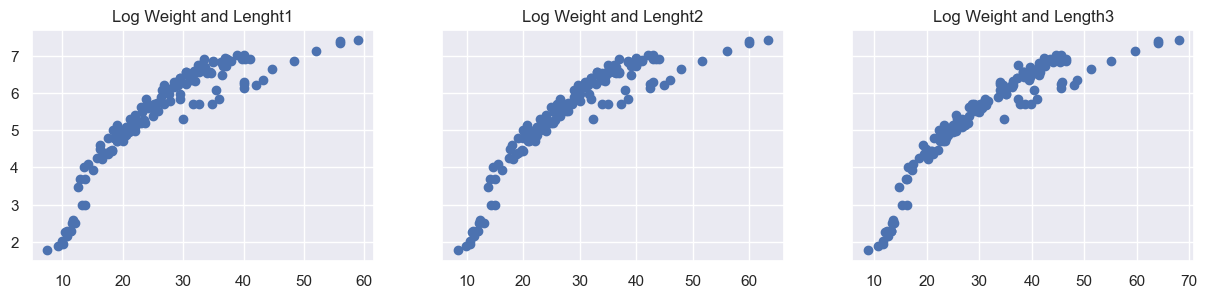

In [64]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(raw_data['Length1'], raw_data['log_weight'])
ax1.set_title('Log Weight and Lenght1')

ax2.scatter(raw_data['Length2'], raw_data['log_weight'])
ax2.set_title('Log Weight and Lenght2')

ax3.scatter(raw_data['Length3'], raw_data['log_weight'])
ax3.set_title('Log Weight and Length3')

plt.show()

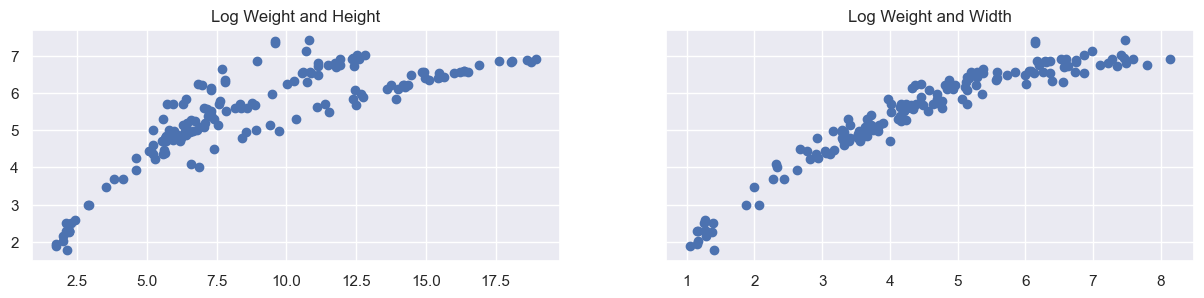

In [65]:
f, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(15,3))
ax1.scatter(raw_data['Height'], raw_data['log_weight'])
ax1.set_title('Log Weight and Height')

ax2.scatter(raw_data['Width'], raw_data['log_weight'])
ax2.set_title('Log Weight and Width')

plt.show()

### Create dummy variables

In [67]:
data_with_dummies = pd.get_dummies(raw_data,drop_first=True, dtype=int)

In [68]:
data_with_dummies.head()

,Weight,Length1,Length2,Length3,Height,Width,log_weight,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.00,23.20,25.40,30.00,11.52,4.02,5.49,0,0,0,0,0,0
1,290.00,24.00,26.30,31.20,12.48,4.31,5.67,0,0,0,0,0,0
2,340.00,23.90,26.50,31.10,12.38,4.70,5.83,0,0,0,0,0,0
3,363.00,26.30,29.00,33.50,12.73,4.46,5.89,0,0,0,0,0,0
4,430.00,26.50,29.00,34.00,12.44,5.13,6.06,0,0,0,0,0,0


## Linear regression model where 'Weight' is not transformed

### Declare the inputs and targets

In [69]:
targets = data_with_dummies['log_weight']
inputs = data_with_dummies.drop(['Weight','log_weight'],axis =1)

### Scale the data

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [71]:
input_scaled = scaler.transform(inputs)

### Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=1)

### Create the regression

In [73]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [74]:
y_hat = reg.predict(x_train)

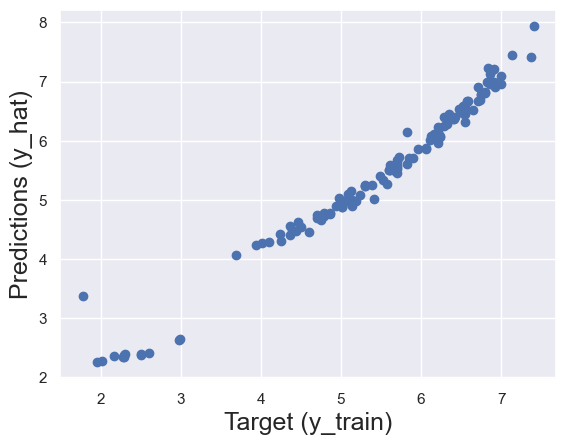

In [75]:
plt.scatter(y_train,y_hat)
plt.xlabel('Target (y_train)', size =18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Residuals PDF')

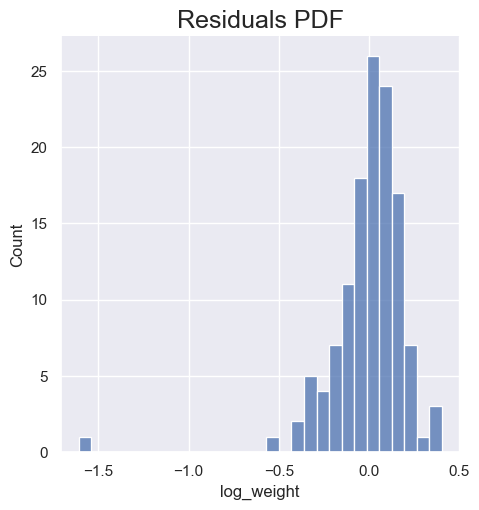

In [76]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size =18)

### Calculating the R-squared

In [77]:
reg.score(x_train,y_train)

0.9740407368886005

### Finding the weights and bias

In [78]:
reg.intercept_

5.401799631769204

In [79]:
reg.coef_

array([ 1.05059371, -1.31551554,  0.77999739,  0.38668535,  0.31121152,
        0.05815917,  0.14905133,  0.09372752,  0.09503356, -0.26324175,
        0.08810042])

In [80]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Length1,1.05
1,Length2,-1.32
2,Length3,0.78
3,Height,0.39
4,Width,0.31
5,Species_Parkki,0.06
6,Species_Perch,0.15
7,Species_Pike,0.09
8,Species_Roach,0.10
9,Species_Smelt,-0.26


### Testing

In [81]:
y_hat_test = reg.predict(x_test)

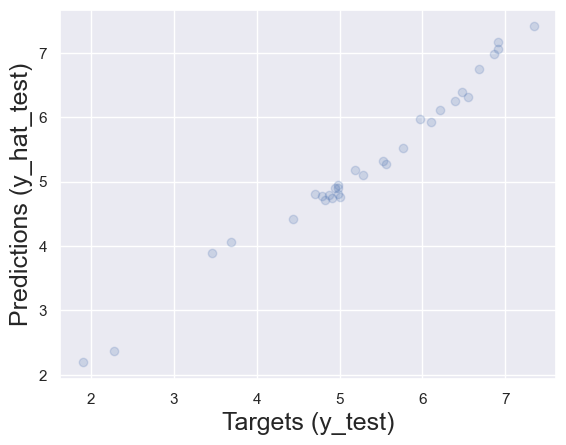

In [82]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.show()

In [83]:
pd.set_option('display.float_format', lambda x:'%.2f' % x)
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()

,Prediction
0,1157.95
1,118.63
2,516.19
3,120.38
4,83.60


In [84]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,1157.95,NaN
1,118.63,NaN
2,516.19,NaN
3,120.38,NaN
4,83.60,NaN
5,596.54,450.00
6,134.73,NaN
7,450.20,NaN
8,118.87,NaN
9,141.08,NaN


In [85]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   6.91
1   4.79
2   6.40
3   4.87
4   4.44
Name: log_weight, dtype: float64

In [86]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,1157.95,1000.00
1,118.63,120.00
2,516.19,600.00
3,120.38,130.00
4,83.60,85.00
5,596.54,650.00
6,134.73,145.00
7,450.20,500.00
8,118.87,0.00
9,141.08,145.00


In [87]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [88]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,1157.95,1000.00,-157.95,15.79
1,118.63,120.00,1.37,1.14
2,516.19,600.00,83.81,13.97
3,120.38,130.00,9.62,7.40
4,83.60,85.00,1.40,1.65
5,596.54,650.00,53.46,8.22
6,134.73,145.00,10.27,7.09
7,450.20,500.00,49.80,9.96
8,118.87,0.00,-118.87,inf
9,141.08,145.00,3.92,2.70


In [55]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,3.200000e+01,3.200000e+01,2.700000e+01,2.700000e+01
mean,inf,inf,3.756415e+302,5.589611e+64
std,NaN,NaN,inf,2.442104e+65
min,3.549717e-81,1.000000e+00,-6.081304e+232,9.999702e+01
25%,6.079088e+63,1.454942e+54,-1.344636e+108,1.000000e+02
50%,1.344636e+108,7.446921e+77,-8.338422e+75,7.704893e+20
75%,4.016425e+236,9.432551e+259,4.111504e+36,9.854737e+35
max,inf,inf,1.014232e+304,1.252659e+66


In [89]:
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
17,392.06,390.00,-2.06,0.53
22,178.74,180.00,1.26,0.70
1,118.63,120.00,1.37,1.14
4,83.60,85.00,1.40,1.65
9,141.08,145.00,3.92,2.70
16,134.16,140.00,5.84,4.17
28,1649.00,1550.00,-99.00,6.39
14,856.50,800.00,-56.50,7.06
6,134.73,145.00,10.27,7.09
3,120.38,130.00,9.62,7.40
